<a href="https://colab.research.google.com/github/sidharth-ds/payment-Fraud-Detection-project/blob/main/Online_Payment_Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* To identify online payment fraud with machine learning, we need to train a machine learning model for classifying fraudulent and non-fraudulent payments. 
* For this, we need a dataset containing information about online payment fraud, so that we can understand what type of transactions lead to fraud.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [41]:
data = pd.read_csv("/content/online payment fraud detection.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Features of the dataset:
* step: represents a unit of time where 1 step equals 1 hour
* type: type of online transaction
* amount: the amount of the transaction
* nameOrig: customer starting the transaction
* oldbalanceOrg: balance before the transaction
* newbalanceOrig: balance after the transaction
* nameDest: recipient of the transaction
* oldbalanceDest: initial balance of recipient before the transaction
* newbalanceDest: the new balance of recipient after the transaction
* isFraud: fraud transaction

In [42]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [43]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### EDA:

In [44]:
# Exploring transaction type
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [45]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values

print("Transactions:", transactions)
print("\nQuantity:",quantity)

Transactions: Index(['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'], dtype='object')

Quantity: [2237500 2151495 1399284  532909   41432]


In [46]:
import plotly.express as px

figure = px.pie(data, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Distribution of Transaction Type",
             width=700, height=400)
figure.show()

* from the above graph, we can Transaction mostly happens for the purpose Cash_withdrawal and Payments.
* Tranfer_money (which is suspectable) is around 8%

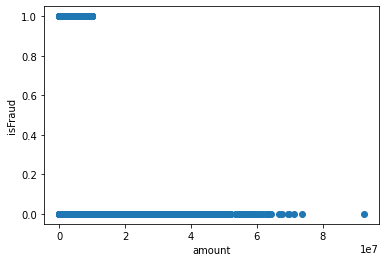

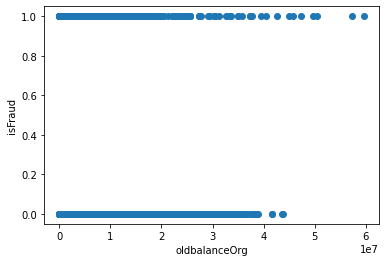

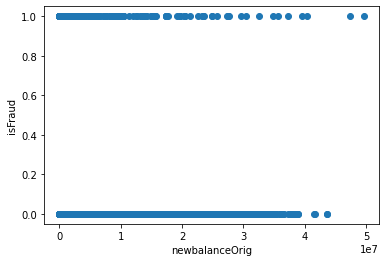

In [48]:
plt.scatter(y=data["isFraud"],x=data["amount"])
plt.xlabel('amount')
plt.ylabel('isFraud')
plt.show()

plt.scatter(y=data["isFraud"],x=data["oldbalanceOrg"])
plt.xlabel('oldbalanceOrg')
plt.ylabel('isFraud')
plt.show()

plt.scatter(y=data["isFraud"],x=data["newbalanceOrig"])
plt.xlabel('newbalanceOrig')
plt.ylabel('isFraud')
plt.show()

from the above visuals we can say that, fraud happens when: (in general)
* amount is < 1,75,00,000
* oldbalance is < 3,00,00,000
* newbalace is < 1,50,00,000

### Encoding:

In [49]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
# data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [50]:
data.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,2.06,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,0.98,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,1.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,2.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,3.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,5.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


In [51]:
data.dropna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


### Splitting:

In [61]:
from sklearn.model_selection import train_test_split
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data["isFraud"])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)

### scaling the data

In [62]:
from sklearn.preprocessing import StandardScaler      
scaler = StandardScaler()     

scaler.fit(xtrain)      
xtrain = scaler.transform(xtrain)     
xtest = scaler.transform(xtest) 

### Modelling:

In [63]:
# training a machine learning model
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9997233843919643


score of 0.99 shows the model is the best model.

### Prediction:

In [64]:
y_pred = model.predict(xtest)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
df = pd.DataFrame({'Actual': ytest, 'Predicted': y_pred})
df

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
636257,0,0
636258,0,0
636259,0,0
636260,0,0


In [55]:
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[4, 9000.60, 9000.60, 0.0]])
print(model.predict(features))

[1]


for the above data, Fraud is predicted to happen